<a href="https://colab.research.google.com/github/Dinesh7126-kumar/chatbot/blob/main/shadowfox_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving delhiaqi.csv to delhiaqi.csv


In [4]:
df=pd.read_csv('delhiaqi.csv')

In [5]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [6]:
print(df.columns)

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
print(df.isnull().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [9]:
def calculate_sub_index(concentration, breakpoints):
    for bp in breakpoints:
        BLO, BHI, ILO, IHI = bp
        if BLO <= concentration <= BHI:
            return ((IHI - ILO) / (BHI - BLO)) * (concentration - BLO) + ILO
    return None  # If out of range


In [10]:
# Breakpoints format: [BLO, BHI, ILO, IHI]

breakpoints = {
    'pm2_5': [
        [0,30,0,50],[31,60,51,100],[61,90,101,200],
        [91,120,201,300],[121,250,301,400],[251,500,401,500]
    ],
    'pm10': [
        [0,50,0,50],[51,100,51,100],[101,250,101,200],
        [251,350,201,300],[351,430,301,400],[431,1000,401,500]
    ],
    'no2': [
        [0,40,0,50],[41,80,51,100],[81,180,101,200],
        [181,280,201,300],[281,400,301,400],[401,1000,401,500]
    ],
    'so2': [
        [0,40,0,50],[41,80,51,100],[81,380,101,200],
        [381,800,201,300],[801,1600,301,400],[1601,10000,401,500]
    ],
    'co': [
        [0,1,0,50],[1.1,2,51,100],[2.1,10,101,200],
        [10.1,17,201,300],[17.1,34,301,400],[34.1,100,401,500]
    ],
    'o3': [
        [0,50,0,50],[51,100,51,100],[101,168,101,200],
        [169,208,201,300],[209,748,301,400],[749,1000,401,500]
    ],
    'nh3': [
        [0,200,0,50],[201,400,51,100],[401,800,101,200],
        [801,1200,201,300],[1201,1800,301,400],[1801,4000,401,500]
    ]
}


In [11]:
def calculate_aqi(row):
    sub_indices = []
    for pollutant in breakpoints.keys():
        if pollutant in row and pd.notnull(row[pollutant]):
            sub_index = calculate_sub_index(row[pollutant], breakpoints[pollutant])
            if sub_index is not None:
                sub_indices.append(sub_index)
    return max(sub_indices) if sub_indices else None

df['AQI'] = df.apply(calculate_aqi, axis=1)
df[['date','AQI']].head()


,date,AQI
0,2023-01-01 00:00:00,338.059767
1,2023-01-01 01:00:00,348.458605
2,2023-01-01 02:00:00,377.168605
3,2023-01-01 03:00:00,401.755422
4,2023-01-01 04:00:00,407.106988


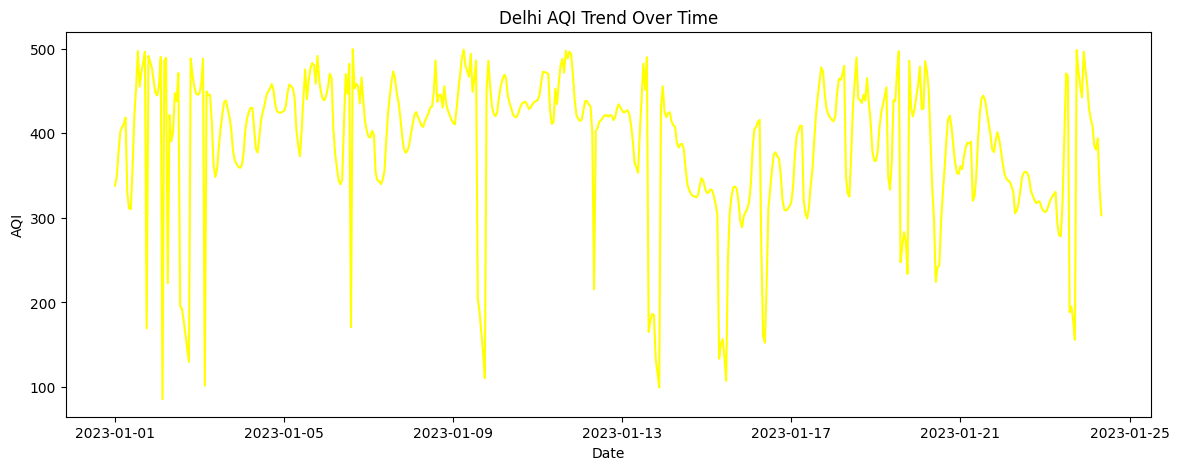

In [12]:
plt.figure(figsize=(14,5))
plt.plot(df['date'], df['AQI'], color='yellow')
plt.title('Delhi AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()


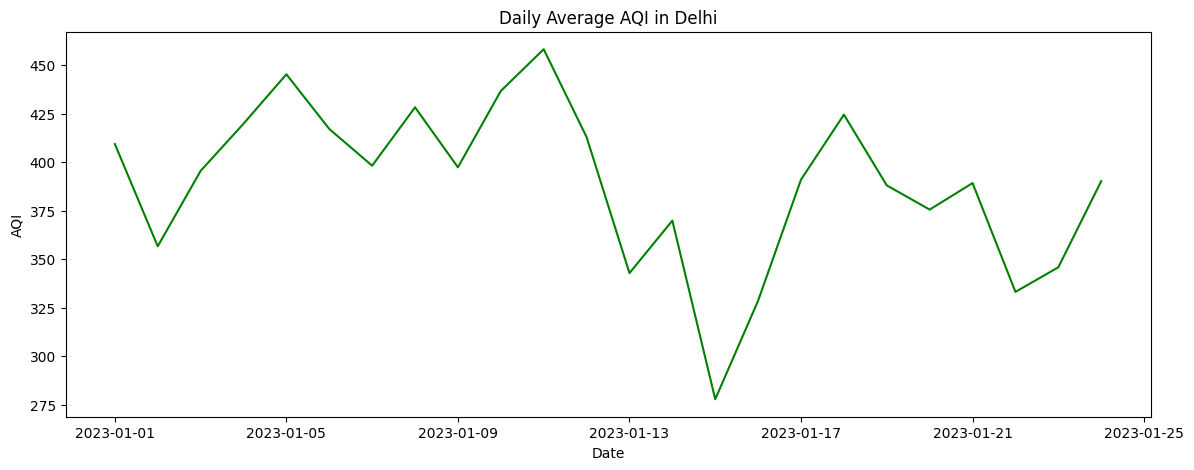

In [13]:
# Convert hourly data to daily average
df_daily = df.resample('D', on='date').mean()

plt.figure(figsize=(14,5))
plt.plot(df_daily.index, df_daily['AQI'], color='green')
plt.title('Daily Average AQI in Delhi')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()


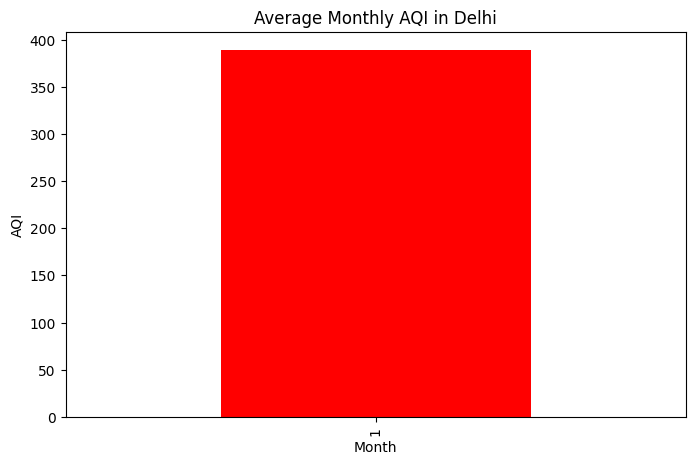

In [14]:
df['Month'] = df['date'].dt.month
monthly_avg = df.groupby('Month')['AQI'].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(kind='bar', color='red')
plt.title('Average Monthly AQI in Delhi')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()


/tmp/ipython-input-1430590300.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='AQI', data=df, palette='Set2')


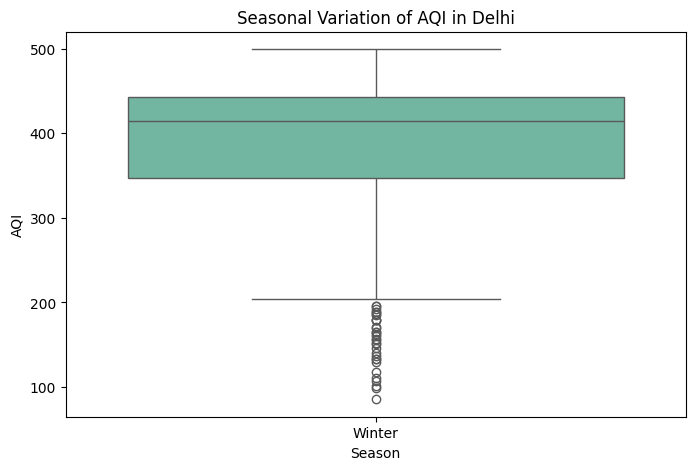

In [15]:
def get_season(month):
    if month in [12,1,2]: return 'Winter'
    elif month in [3,4,5]: return 'Summer'
    elif month in [6,7,8,9]: return 'Monsoon'
    else: return 'Post-Monsoon'

df['Season'] = df['Month'].apply(get_season)

plt.figure(figsize=(8,5))
sns.boxplot(x='Season', y='AQI', data=df, palette='Set2')
plt.title('Seasonal Variation of AQI in Delhi')
plt.show()


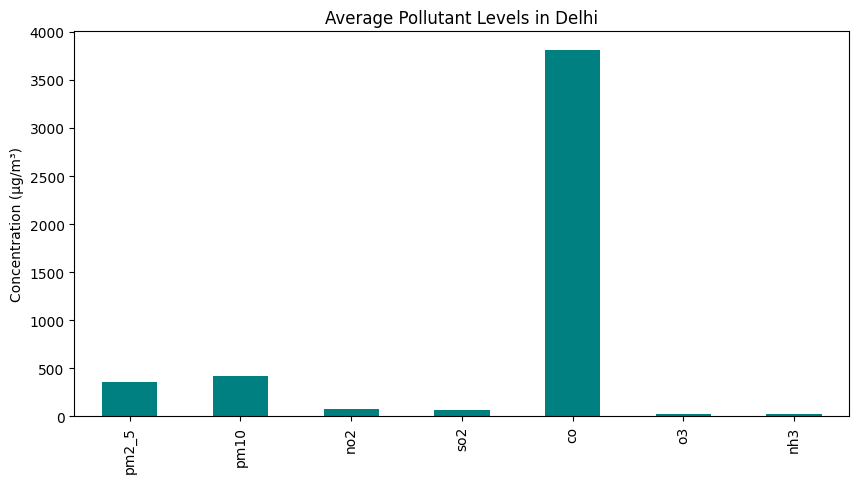

In [16]:
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'nh3']

df[pollutants].mean().plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Average Pollutant Levels in Delhi')
plt.ylabel('Concentration (µg/m³)')
plt.show()


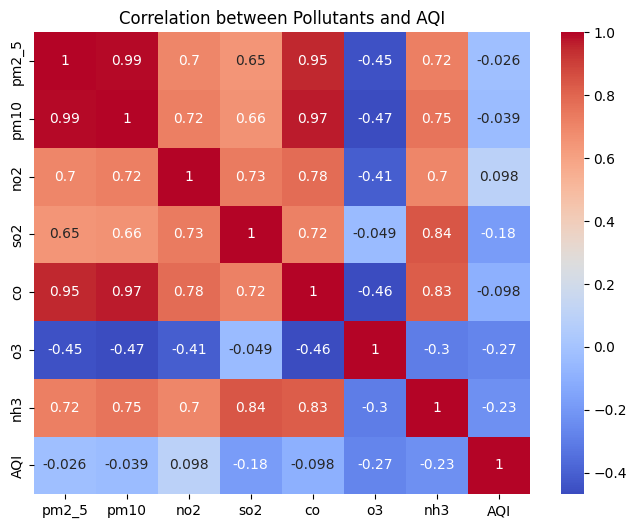

In [17]:
corr = df[pollutants + ['AQI']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Pollutants and AQI')
plt.show()


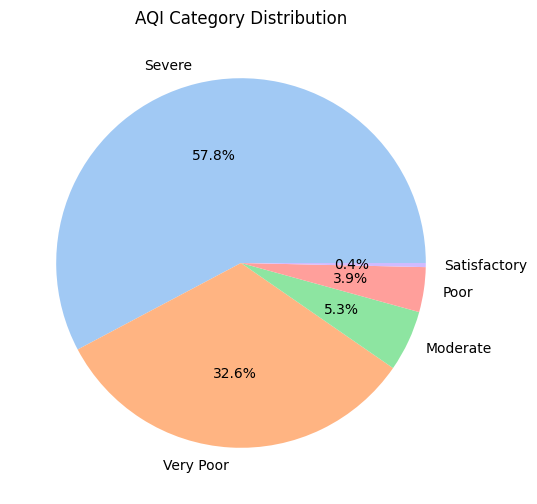

In [18]:
def categorize_aqi(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Satisfactory'
    elif aqi <= 200: return 'Moderate'
    elif aqi <= 300: return 'Poor'
    elif aqi <= 400: return 'Very Poor'
    else: return 'Severe'

df['AQI_Category'] = df['AQI'].apply(categorize_aqi)

category_counts = df['AQI_Category'].value_counts()

plt.figure(figsize=(6,6))
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('AQI Category Distribution')
plt.ylabel('')
plt.show()


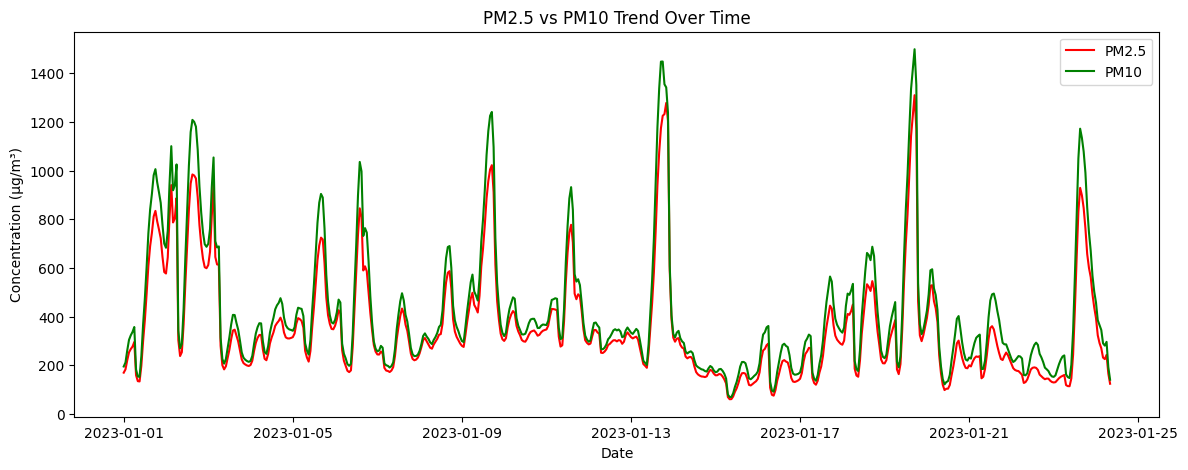

In [19]:
plt.figure(figsize=(14,5))
plt.plot(df['date'], df['pm2_5'], label='PM2.5', color='red')
plt.plot(df['date'], df['pm10'], label='PM10', color='green')
plt.title('PM2.5 vs PM10 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()
